# 1 (3.3)

In [12]:
%reset -f

In [5]:
import numpy as np
import cvxpy as cp

def a():
    x = cp.Variable()
    y = cp.Variable()
    obj = cp.Minimize(0)
    constraints = [cp.norm(cp.vstack([x + 2 * y, x - y])) == 0]
    problem = cp.Problem(obj, constraints)
    print(f"a before: {problem.is_dcp()}")

    constraints = [cp.norm(cp.vstack([x + 2 * y, x - y])) <= 0]
    problem = cp.Problem(obj, constraints)
    print(f"a after: {problem.is_dcp()}")
    problem.solve()

def b():
    x = cp.Variable()
    y = cp.Variable()
    obj = cp.Minimize(0)
    constraints = [cp.square(cp.square(x + y)) <= x - y]
    problem = cp.Problem(obj, constraints)
    print(f"b before and after!: {problem.is_dcp()}")
    problem.solve()

def c():
    x = cp.Variable()
    y = cp.Variable()
    obj = cp.Minimize(0)
    constraints = [x >= 0, y >= 0, 1/x + 1/y <=1]
    problem = cp.Problem(obj, constraints)
    print(f"c before: {problem.is_dcp()}")

    x = cp.Variable(nonneg=True)
    y = cp.Variable(nonneg=True)
    obj = cp.Minimize(0)
    constraints = [cp.inv_pos(x) + cp.inv_pos(y) <=1, x >= 0, y >= 0]
    problem = cp.Problem(obj, constraints)
    print(f"c after: {problem.is_dcp()}")
    problem.solve()

def d():
    x = cp.Variable()
    y = cp.Variable()
    obj = cp.Minimize(0)
    constraints = [
            cp.norm(cp.vstack([cp.maximum(x, 1), cp.maximum(y, 2)])) <= 3 * x + y
            ]
    problem = cp.Problem(obj, constraints)
    print(f"d before: {problem.is_dcp()}")

    x = cp.Variable()
    y = cp.Variable()
    a = cp.Variable()
    b = cp.Variable()
    obj = cp.Minimize(0)
    constraints = [
            cp.norm(cp.vstack([a, b])) <= 3 * x + y,
            a >= cp.maximum(x, 1),
            b >= cp.maximum(y, 2),
            ]
    problem = cp.Problem(obj, constraints)
    print(f"d after: {problem.is_dcp()}")
    problem.solve()

def e():
    x = cp.Variable()
    y = cp.Variable()
    obj = cp.Minimize(0)
    constraints = [
            x * y >= 1,
            x >= 0,
            y >= 0
            ]
    problem = cp.Problem(obj, constraints)
    print(f"e before: {problem.is_dcp()}")

    x = cp.Variable()
    y = cp.Variable()
    obj = cp.Minimize(0)
    constraints = [
            cp.inv_pos(y) - x <= 1,
            x >= 0,
            ]
    problem = cp.Problem(obj, constraints)
    print(f"e after: {problem.is_dcp()}")
    problem.solve()

def f():
    x = cp.Variable()
    y = cp.Variable()
    obj = cp.Minimize(x)
    constraints = [
            (x + y)**2 / cp.sqrt(y) <= x - y + 5
            ]
    problem = cp.Problem(obj, constraints)
    print(f"f before: {problem.is_dcp()}")

    x = cp.Variable()
    y = cp.Variable()
    a = cp.Variable()
    b = cp.Variable()
    obj = cp.Minimize(x)
    constraints = [
            cp.quad_over_lin(a, b) <= x - y + 5,
            a == x + y,
            b <= cp.sqrt(y),
            ]
    problem = cp.Problem(obj, constraints)
    print(f"f after: {problem.is_dcp()}")
    problem.solve()

def g():
    x = cp.Variable()
    y = cp.Variable()
    obj = cp.Minimize(x)
    constraints = [
            x**3 + y**3 <= 1,
            ]
    problem = cp.Problem(obj, constraints)
    print(f"g before: {problem.is_dcp()}")
    problem.solve()
    print(f"g solution: {x.value:.2f}")

def h():
    x = cp.Variable()
    y = cp.Variable()
    z = cp.Variable()
    obj = cp.Minimize(0)
    constraints = [
            x + z <= 1 + cp.sqrt(x * y - z**2),
            x >= 0,
            y >= 0,
            ]
    problem = cp.Problem(obj, constraints)
    print(f"h before: {problem.is_dcp()}")
   
    t = cp.Variable()
    constraints = [
            x + z - 1 <= t,
            cp.norm(cp.vstack([x, t])) <= cp.geo_mean(cp.vstack([x, y])),
            x >= 0,
            y >= 0,
            ]
    problem = cp.Problem(obj, constraints)
    print(f"h after: {problem.is_dcp()}")
    problem.solve()

a()
b()
c()
d()
e()
f()
g()
h()

a before: False
a after: True
b before and after!: True
c before: False
c after: True
d before: True
d after: True
e before: False
e after: True
f before: False
f after: True
g before: True
g solution: -0.00
h before: False
h after: True


# 3 (3.32)

In [8]:
%reset -f

In [9]:
import numpy as np
import cvxpy as cp

from satisfy_some_constraints_data import m, n, k, A, b, c
epsilon = 1e-5

u = cp.Variable()
v = cp.Variable()
x = cp.Variable((A.shape[1],))
f_x = A @ x - b
constraints = [
        cp.sum(cp.pos(f_x + u)) <= (m - k) * u,
        cp.inv_pos(v) <= u,
        ]
obj = cp.Minimize(c @ x)
p1 = cp.Problem(obj, constraints)
p1.solve()
if p1.status == 'optimal':
    lambda_value = 1 / u.value
    print(f'lambda: {lambda_value:.4f}')
    print(f'objective value: {p1.value:.4f}')
    f_values = np.matmul(A, x.value) - b
    satisfied = f_values <= epsilon
    satisfied_count = satisfied.sum()
    print(f"satisfied count: {satisfied_count}")
    #part b
    smallest_indexes = np.argsort(f_values)[:k]
    constraints = [A[smallest_indexes,:] @ x <= b[smallest_indexes]]
    p2 = cp.Problem(obj, constraints) 
    p2.solve()
    print(f'Improved objective value: {p2.value:.4f}')


lambda: 282.9845
objective value: -8.4545
satisfied count: 66
Improved objective value: -8.8011


# 5 (6.5)

In [10]:
%reset -f

problem status: optimal
x = [ 0.482 -0.465  0.936  0.929]


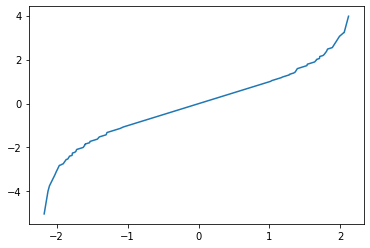

In [11]:
import numpy as np
import cvxpy as cp
import matplotlib.pyplot as plt

from nonlin_meas_data import m, n, sigma, alpha, beta, A, y
np.set_printoptions(precision=3)

EPSILON = 1e-8
#Verifying that the data is sorted
for i in range(m - 1):
    assert y[i] < y[i + 1] + EPSILON

z = cp.Variable(m)
x = cp.Variable(n)
next_diff_z = z[1:] - z[:-1]
next_diff_y = y[1:] - y[:-1]
constraints = [
        next_diff_z <= next_diff_y / alpha,
        next_diff_z >= next_diff_y / beta,
        ]
obj = cp.Minimize(cp.sum_squares(A @ x - z))
problem = cp.Problem(obj, constraints)
problem.solve()
print(f"problem status: {problem.status}")
if problem.status == 'optimal':
    print(f"x = {x.value}")
    plt.plot(y, z.value)
    plt.show()
